**PROBLEM STATEMEMENT**: We have consolidates the data for each of the player sold  in the IPL 2022 auction and that of the reatained player from each franchise.

**THE DATA CONTAINS INFORMATION LIKE**- matches played, runs, wickets, average, strike rate, catches, runouts, stumps, etc.

**BASIC ON THESE DATA POINTS**- We will try to create the best 11 from these set of players  from the current campaign.
we can summarise our analysis in the following steps:
1. Extraction and loading the data.
2. Cleaning the data and removing the noise.
3. Analyze the data on different parameters.
4. Visualizing the important statistical findings.
5. Making the best team of the 11 - based on the **ICC WORLD CUP** winning squad formaton and last year's squad formation of the winning team in the **IPL**. i.e. how many batters. bowlers and allrounders should be included in the team.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Data

To import the dataset, we will use the pandas package from the python programming language. The other package like matplpotlib, seaborn and numpy will be use for the computations, and creating visual representations.

In [ ]:
data = pd.read_csv("IPLData.csv")

In [ ]:
#first look of the data, head() returns the first 5 rows of the dataset.
data.head()

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate,Catches,Run_outs,Stumps
0,Shikhar Dhawan,Punjab,Indian,Batter,1,192.0,5783.0,34.63,126.60,4.0,16.5,8.25,12.0,83.0,NaN,NaN
1,David Warner,Delhi,Overseas,Batter,1,150.0,5449.0,41.59,139.97,NaN,NaN,NaN,NaN,68.0,NaN,NaN
2,Faf Du Plessis,Bangalore,Overseas,Batter,1,100.0,2935.0,34.94,131.08,NaN,NaN,NaN,NaN,66.0,NaN,NaN
3,Shreyas Iyer,Kolkata,Indian,Batter,1,87.0,2375.0,31.67,123.96,NaN,NaN,NaN,NaN,34.0,NaN,NaN
4,Manish Pandey,Lucknow,Indian,Batter,1,154.0,3560.0,30.68,121.83,NaN,NaN,NaN,NaN,76.0,NaN,NaN


In [ ]:
#describe function will return the necessary information like count, mean, std deviation, etc for the entire dataset.
data.describe()

,Capped,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate,Catches,Run_outs,Stumps
count,235.000000,215.000000,165.000000,161.000000,163.000000,140.000000,135.000000,143.000000,119.000000,33.000000,27.000000,27.000000
mean,0.838298,43.897674,840.575758,21.792516,121.009877,31.485714,32.907185,8.223182,24.686134,35.696970,3.444444,6.259259
std,0.561802,48.695302,1270.341831,11.664212,30.739169,36.872420,18.191441,1.223541,12.982049,34.408833,5.010246,9.928950
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.360000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,11.500000,67.000000,13.800000,112.635000,6.000000,23.025000,7.390000,18.495000,6.000000,0.000000,0.000000
50%,1.000000,25.000000,289.000000,22.410000,128.630000,19.500000,29.070000,8.190000,21.750000,21.000000,1.000000,2.000000
75%,1.000000,56.000000,954.000000,29.300000,137.550000,40.500000,36.030000,8.785000,26.190000,58.000000,4.000000,7.000000
max,2.000000,220.000000,6283.000000,58.500000,190.240000,167.000000,153.000000,13.120000,108.000000,126.000000,21.000000,39.000000


In [ ]:
#we can check the number of null value using the isna().sum() method.
data.isna().sum()

Player Name              0
Team                     0
Nationality              0
Player_Type              0
Capped                   0
Matches_Played          20
Runs                    70
Average                 74
Strike_Rate             72
Wickets                 95
Bowling_average        100
Economy                 92
Bowling_Strike_Rate    116
Catches                202
Run_outs               208
Stumps                 208
dtype: int64

In [ ]:
#The info method will return the information about the dataset like the null objects, and the data type of each of the element in the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player Name          235 non-null    object 
 1   Team                 235 non-null    object 
 2   Nationality          235 non-null    object 
 3   Player_Type          235 non-null    object 
 4   Capped               235 non-null    int64  
 5   Matches_Played       215 non-null    float64
 6   Runs                 165 non-null    float64
 7   Average              161 non-null    float64
 8   Strike_Rate          163 non-null    float64
 9   Wickets              140 non-null    float64
 10  Bowling_average      135 non-null    float64
 11  Economy              143 non-null    float64
 12  Bowling_Strike_Rate  119 non-null    float64
 13  Catches              33 non-null     float64
 14  Run_outs             27 non-null     float64
 15  Stumps               27 non-null     flo

# Cleaning the Data

In the above data, the players can be initailly segragated based on following parameters

1. Capped - Batters, Bowlers, Allrounders, Wicket Keepers
2. Uncapped - Batters, Bowlers, Allrounders, Wicket Keepers

The uncapped players are playing IPL for the first time, or relavent data isn't available therefore we have usind for domestic T20 performances, and T20 international performances.


In [ ]:
#segregating Data - Capped Batters
#we have kept the batting parameters to restrict the analysis for batter specific tendencies.
batters = data.loc[(data["Player_Type"] == "Batter")]

batters_new = batters.loc[(batters["Capped"] == 1)]

Capped_Batters = batters_new[['Player Name',
                              'Team',
                              'Nationality',
                              'Matches_Played',
                              'Runs',
                              'Average',
                              'Strike_Rate']]

In [ ]:
#The segregation of the batters based on the capped data gives us the batters that have a history of the playing IPL matches.
Capped_Batters.head()

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
0,Shikhar Dhawan,Punjab,Indian,192.0,5783.0,34.63,126.60
1,David Warner,Delhi,Overseas,150.0,5449.0,41.59,139.97
2,Faf Du Plessis,Bangalore,Overseas,100.0,2935.0,34.94,131.08
3,Shreyas Iyer,Kolkata,Indian,87.0,2375.0,31.67,123.96
4,Manish Pandey,Lucknow,Indian,154.0,3560.0,30.68,121.83


In [ ]:
#segregating Data - Capped Bowlers
#we have kept the bowling parameters, since we will purely judge the bowlers on their bowling statistics.
bowlers = data.loc[(data["Player_Type"] == "Bowler ")]

bowlers_new = bowlers.loc[(bowlers["Capped"] == 1)]

Capped_Bowlers = bowlers_new[['Player Name',
                              'Team',
                              'Nationality',
                              'Matches_Played',
                              'Wickets',
                              'Bowling_average',
                              'Economy',
                              'Bowling_Strike_Rate']]

In [ ]:
#capped bowlers contains the bowlers data that has already played IPL matches before the 2022 campaign 
Capped_Bowlers.head()

,Player Name,Team,Nationality,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
36,Kagiso Rabada,Punjab,Overseas,50.0,76.0,20.53,8.21,15.00
37,Trent Boult,Rajasthan,Overseas,62.0,76.0,26.09,8.40,18.64
38,Mohammad Shami,Gujarat,Indian,77.0,79.0,30.41,8.63,21.14
39,T Natarajan,Hyderabad,Indian,24.0,20.0,34.40,8.24,25.05
40,Deepak Chahar,Chennai,Indian,63.0,59.0,29.19,7.80,22.44


In [ ]:
#segregating Data - Capped Keepers
#we are only keeping the relavant parameters for the  keepers, since bowling figures are not needed for the wicket-keepers.
Keepers = data.loc[(data["Player_Type"] == "Keeper")]

Keepers_new = Keepers.loc[(Keepers["Capped"] == 1)]

Capped_Keepers = Keepers_new[['Player Name',
                              'Team',
                              'Nationality',
                              'Matches_Played',
                              'Runs',
                              'Average',
                              'Strike_Rate',
                              'Catches',
                              'Run_outs',
                              'Stumps']]

In [ ]:
#the capped keepers data consists of keepers that have a history of playing IPL matches.
Capped_Keepers.head()

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.3,130.9,53.0,0.0,14.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.4,127.5,58.0,12.0,2.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.5,136.3,19.0,1.0,2.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.5,142.2,18.0,1.0,4.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.8,129.7,123.0,14.0,32.0


In [ ]:
#segregating Data - Capped Allrounders
#we have kept the bowling and batting parameters for the allrounders to analyze all round performance.
Allrounders = data.loc[(data["Player_Type"] == "Allrounder")]

Allrounders_new = Allrounders.loc[(Allrounders["Capped"] == 1)]

Capped_Allrounders = Allrounders_new[['Player Name',
                              'Team',
                              'Nationality',
                              'Matches_Played',
                              'Runs',
                              'Average',
                              'Strike_Rate',
                              'Wickets',
                              'Bowling_average',
                              'Economy',
                              'Bowling_Strike_Rate']]

In [ ]:
#the capped allrounders data consist of the allrounders who have already played the IPL matches before 2022.
Capped_Allrounders.head()

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
127,Ravichandran Ashwin,Rajasthan,Indian,167.0,456.0,11.12,109.88,145.0,27.80,6.91,24.12
128,Pat Cummins,Kolkata,Overseas,37.0,316.0,19.75,140.44,38.0,30.13,8.24,21.95
129,Dwayne Bravo,Chennai,Overseas,151.0,1537.0,22.94,130.25,167.0,24.32,8.36,17.44
130,Nitish Rana,Kolkata,Indian,77.0,1820.0,28.00,132.46,7.0,22.00,8.03,16.43
131,Jason Holder,Lucknow,Overseas,26.0,189.0,14.54,121.15,35.0,22.46,8.20,16.43


In [ ]:
#Cleaning the data by making the null or NAN values 0.
Capped_Batters = Capped_Batters.fillna(0)
Capped_Bowlers = Capped_Bowlers.fillna(0)
Capped_Allrounders = Capped_Allrounders.fillna(0)
Capped_Keepers = Capped_Keepers.fillna(0)


In [ ]:
#Checking null valvue in the data
print(Capped_Batters.isna().sum())
print(Capped_Bowlers.isna().sum())
print(Capped_Allrounders.isna().sum())
print(Capped_Allrounders.isna().sum())

Player Name       0
Team              0
Nationality       0
Matches_Played    0
Runs              0
Average           0
Strike_Rate       0
dtype: int64
Player Name            0
Team                   0
Nationality            0
Matches_Played         0
Wickets                0
Bowling_average        0
Economy                0
Bowling_Strike_Rate    0
dtype: int64
Player Name            0
Team                   0
Nationality            0
Matches_Played         0
Runs                   0
Average                0
Strike_Rate            0
Wickets                0
Bowling_average        0
Economy                0
Bowling_Strike_Rate    0
dtype: int64
Player Name            0
Team                   0
Nationality            0
Matches_Played         0
Runs                   0
Average                0
Strike_Rate            0
Wickets                0
Bowling_average        0
Economy                0
Bowling_Strike_Rate    0
dtype: int64


# Initial Analysis

In this sction, we will analyze data for batters,bowlers,keepers and allrounders.

In [ ]:
#Analyzing the Batters Data
#Here we have narrowed our analysis to batters who have a batting average more the 32.0
top_batters = Capped_Batters.loc[(Capped_Batters["Average"] >= 32.0)]

#Sorting the data in descending order - with respect to each parameter
top_batters_average = top_batters.sort_values('Average', ascending=False)
top_batters_strike_rate = top_batters.sort_values('Strike_Rate', ascending=False)
top_batters_runs = top_batters.sort_values('Runs', ascending=False)
top_batters_matches = top_batters.sort_values('Matches_Played', ascending=False)

In [ ]:
#the data of each of the batters in descending order of  batting averages.
top_batters_average

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
212,KL Rahul,Lucknow,Indian,94.0,3273.0,47.43,136.38
231,Ruturaj Gaikwad,Chennai,Indian,22.0,839.0,46.61,132.13
1,David Warner,Delhi,Overseas,150.0,5449.0,41.59,139.97
207,Kane Williamson,Hyderabad,Overseas,63.0,1885.0,40.11,131.27
208,Virat Kohli,Bangalore,Indian,207.0,6283.0,37.40,129.95
2,Faf Du Plessis,Bangalore,Overseas,100.0,2935.0,34.94,131.08
0,Shikhar Dhawan,Punjab,Indian,192.0,5783.0,34.63,126.60
26,David Miller,Gujarat,Overseas,89.0,1974.0,32.90,136.51


In [ ]:
#the run scored data of the batters in descending order.
top_batters_runs

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
208,Virat Kohli,Bangalore,Indian,207.0,6283.0,37.40,129.95
0,Shikhar Dhawan,Punjab,Indian,192.0,5783.0,34.63,126.60
1,David Warner,Delhi,Overseas,150.0,5449.0,41.59,139.97
212,KL Rahul,Lucknow,Indian,94.0,3273.0,47.43,136.38
2,Faf Du Plessis,Bangalore,Overseas,100.0,2935.0,34.94,131.08
26,David Miller,Gujarat,Overseas,89.0,1974.0,32.90,136.51
207,Kane Williamson,Hyderabad,Overseas,63.0,1885.0,40.11,131.27
231,Ruturaj Gaikwad,Chennai,Indian,22.0,839.0,46.61,132.13


In [ ]:
#the batters data in the descensing order.
top_batters_strike_rate

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
1,David Warner,Delhi,Overseas,150.0,5449.0,41.59,139.97
26,David Miller,Gujarat,Overseas,89.0,1974.0,32.90,136.51
212,KL Rahul,Lucknow,Indian,94.0,3273.0,47.43,136.38
231,Ruturaj Gaikwad,Chennai,Indian,22.0,839.0,46.61,132.13
207,Kane Williamson,Hyderabad,Overseas,63.0,1885.0,40.11,131.27
2,Faf Du Plessis,Bangalore,Overseas,100.0,2935.0,34.94,131.08
208,Virat Kohli,Bangalore,Indian,207.0,6283.0,37.40,129.95
0,Shikhar Dhawan,Punjab,Indian,192.0,5783.0,34.63,126.60


In [ ]:
#the batters matches played data in descending order.
top_batters_matches 

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
208,Virat Kohli,Bangalore,Indian,207.0,6283.0,37.40,129.95
0,Shikhar Dhawan,Punjab,Indian,192.0,5783.0,34.63,126.60
1,David Warner,Delhi,Overseas,150.0,5449.0,41.59,139.97
2,Faf Du Plessis,Bangalore,Overseas,100.0,2935.0,34.94,131.08
212,KL Rahul,Lucknow,Indian,94.0,3273.0,47.43,136.38
26,David Miller,Gujarat,Overseas,89.0,1974.0,32.90,136.51
207,Kane Williamson,Hyderabad,Overseas,63.0,1885.0,40.11,131.27
231,Ruturaj Gaikwad,Chennai,Indian,22.0,839.0,46.61,132.13


from our analysis, if we rank from 0-5, the top three batters that will come analysis each of the above data are:
1. David Warner
2. KL Rahul
3. Virat Kohli

In [ ]:
#Analyzing the Bowlers Data
#here we have narrowed our analysis based on the bowling average of the players to be less then 24.0.
top_bowlers = Capped_Bowlers.loc[(Capped_Bowlers["Bowling_average"] <= 24.0)]

top_bowlers_average = top_bowlers.sort_values('Bowling_average')
top_bowlers_strike_rate = top_bowlers.sort_values('Bowling_Strike_Rate')
top_bowlers_wickets = top_bowlers.sort_values('Wickets', ascending=False)
top_bowlers_economy = top_bowlers.sort_values('Economy')
top_bowlers_matches = top_bowlers.sort_values('Matches_Played', ascending=False)

In [ ]:
#this dataframe contains the top bowling averages in ascending order.
top_bowlers_average

,Player Name,Team,Nationality,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
83,Rasikh Dar,Kolkata,Indian,1.0,1.0,0.00,10.50,0.00
87,Sean Abbott,Hyderabad,Overseas,2.0,0.0,0.00,11.40,0.00
101,Kuldip Yadav,Rajasthan,Indian,1.0,0.0,0.00,8.00,0.00
88,Alzarri Joseph,Gujarat,Overseas,3.0,6.0,14.50,10.04,8.67
93,Lungi Ngidi,Delhi,Overseas,14.0,25.0,17.92,8.30,12.96
36,Kagiso Rabada,Punjab,Overseas,50.0,76.0,20.53,8.21,15.00
234,Anrich Nortje,Delhi,Overseas,24.0,34.0,20.56,7.65,16.12
103,Nathan Coulter-Nile,Rajasthan,Overseas,38.0,48.0,21.92,7.52,17.48
50,Yuzvendra Chahal,Rajasthan,Indian,114.0,139.0,22.28,7.59,17.61
210,Arshdeep Singh,Punjab,Indian,23.0,30.0,22.30,8.78,15.23


In [ ]:
#this dataframe contains the top bowlers run rates in ascending order.
top_bowlers_strike_rate

,Player Name,Team,Nationality,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
83,Rasikh Dar,Kolkata,Indian,1.0,1.0,0.00,10.50,0.00
87,Sean Abbott,Hyderabad,Overseas,2.0,0.0,0.00,11.40,0.00
101,Kuldip Yadav,Rajasthan,Indian,1.0,0.0,0.00,8.00,0.00
88,Alzarri Joseph,Gujarat,Overseas,3.0,6.0,14.50,10.04,8.67
93,Lungi Ngidi,Delhi,Overseas,14.0,25.0,17.92,8.30,12.96
36,Kagiso Rabada,Punjab,Overseas,50.0,76.0,20.53,8.21,15.00
210,Arshdeep Singh,Punjab,Indian,23.0,30.0,22.30,8.78,15.23
234,Anrich Nortje,Delhi,Overseas,24.0,34.0,20.56,7.65,16.12
103,Nathan Coulter-Nile,Rajasthan,Overseas,38.0,48.0,21.92,7.52,17.48
50,Yuzvendra Chahal,Rajasthan,Indian,114.0,139.0,22.28,7.59,17.61


In [ ]:
#this dataframe contains of top wickets in descending orders
top_bowlers_wickets

,Player Name,Team,Nationality,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
50,Yuzvendra Chahal,Rajasthan,Indian,114.0,139.0,22.28,7.59,17.61
215,Jasprit Bumrah,Mumbai,Indian,106.0,130.0,23.05,7.42,18.63
36,Kagiso Rabada,Punjab,Overseas,50.0,76.0,20.53,8.21,15.00
103,Nathan Coulter-Nile,Rajasthan,Overseas,38.0,48.0,21.92,7.52,17.48
214,Varun Chakravarthy,Kolkata,Indian,31.0,36.0,23.31,6.82,20.50
234,Anrich Nortje,Delhi,Overseas,24.0,34.0,20.56,7.65,16.12
210,Arshdeep Singh,Punjab,Indian,23.0,30.0,22.30,8.78,15.23
93,Lungi Ngidi,Delhi,Overseas,14.0,25.0,17.92,8.30,12.96
88,Alzarri Joseph,Gujarat,Overseas,3.0,6.0,14.50,10.04,8.67
83,Rasikh Dar,Kolkata,Indian,1.0,1.0,0.00,10.50,0.00


In [ ]:
#the dataframe consists of the top bowling economy in ascending order.
top_bowlers_economy

,Player Name,Team,Nationality,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
214,Varun Chakravarthy,Kolkata,Indian,31.0,36.0,23.31,6.82,20.50
215,Jasprit Bumrah,Mumbai,Indian,106.0,130.0,23.05,7.42,18.63
103,Nathan Coulter-Nile,Rajasthan,Overseas,38.0,48.0,21.92,7.52,17.48
50,Yuzvendra Chahal,Rajasthan,Indian,114.0,139.0,22.28,7.59,17.61
234,Anrich Nortje,Delhi,Overseas,24.0,34.0,20.56,7.65,16.12
101,Kuldip Yadav,Rajasthan,Indian,1.0,0.0,0.00,8.00,0.00
36,Kagiso Rabada,Punjab,Overseas,50.0,76.0,20.53,8.21,15.00
93,Lungi Ngidi,Delhi,Overseas,14.0,25.0,17.92,8.30,12.96
210,Arshdeep Singh,Punjab,Indian,23.0,30.0,22.30,8.78,15.23
88,Alzarri Joseph,Gujarat,Overseas,3.0,6.0,14.50,10.04,8.67


In [ ]:
#the dataframe contains the matches played by bowlers in desceding order.
top_bowlers_matches

,Player Name,Team,Nationality,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
50,Yuzvendra Chahal,Rajasthan,Indian,114.0,139.0,22.28,7.59,17.61
215,Jasprit Bumrah,Mumbai,Indian,106.0,130.0,23.05,7.42,18.63
36,Kagiso Rabada,Punjab,Overseas,50.0,76.0,20.53,8.21,15.00
103,Nathan Coulter-Nile,Rajasthan,Overseas,38.0,48.0,21.92,7.52,17.48
214,Varun Chakravarthy,Kolkata,Indian,31.0,36.0,23.31,6.82,20.50
234,Anrich Nortje,Delhi,Overseas,24.0,34.0,20.56,7.65,16.12
210,Arshdeep Singh,Punjab,Indian,23.0,30.0,22.30,8.78,15.23
93,Lungi Ngidi,Delhi,Overseas,14.0,25.0,17.92,8.30,12.96
88,Alzarri Joseph,Gujarat,Overseas,3.0,6.0,14.50,10.04,8.67
87,Sean Abbott,Hyderabad,Overseas,2.0,0.0,0.00,11.40,0.00


From the above analysis, if we rank down the parameters from 1-10. the top bowling options are as follows:
1. Kagiso Rabada
2. Jasprit Bumrah
3. Yuzvendra Chahal
4. Nathan Coulter-Nile

In [ ]:
#Analyzing the Keepers Data
#we have narrowed our analysis down to keepers  averaging more than 25.0
top_keepers = Capped_Keepers.loc[(Capped_Keepers["Average"] >= 25.0)]

#Sorting the data in descending order - with respect to each parameter.
top_keepers_average = top_keepers.sort_values('Average', ascending=False)
top_keepers_strike_rate = top_keepers.sort_values('Strike_Rate', ascending=False)
top_keepers_runs = top_keepers.sort_values('Runs', ascending=False)
top_keepers_matches = top_keepers.sort_values('Matches_Played', ascending=False)
top_keepers_catches = top_keepers.sort_values('Catches', ascending=False)
top_keepers_runouts = top_keepers.sort_values('Run_outs', ascending=False)
top_keepers_stumps = top_keepers.sort_values('Stumps', ascending=False)

In [ ]:
#the dataframe consists of the average of the top keepers in the descending order.
top_keepers_average

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
111,KS Bharat,Delhi,Indian,8.0,191.0,38.20,122.40,4.0,0.0,1.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0


In [ ]:
#the dataframe consists of the top keepers strike rate in the descending order.
top_keepers_strike_rate

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
111,KS Bharat,Delhi,Indian,8.0,191.0,38.20,122.40,4.0,0.0,1.0


In [ ]:
#the dataframe consists of the top keepers runs in the descending order.
top_keepers_runs

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
111,KS Bharat,Delhi,Indian,8.0,191.0,38.20,122.40,4.0,0.0,1.0


In [ ]:
#the dataframe consists of the matches played by top keepers in the descending order.
top_keepers_matches

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
111,KS Bharat,Delhi,Indian,8.0,191.0,38.20,122.40,4.0,0.0,1.0


In [ ]:
#the dataframe consists of the top keepers catches data in the descending order.
top_keepers_catches

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
111,KS Bharat,Delhi,Indian,8.0,191.0,38.20,122.40,4.0,0.0,1.0


In [ ]:
#the dataframe consists of the runout data for  top keepers in descending order.
top_keepers_runouts

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
111,KS Bharat,Delhi,Indian,8.0,191.0,38.20,122.40,4.0,0.0,1.0


In [ ]:
#the dataframe consists of the top keepers stumps data in the descending order.
top_keepers_stumps

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
111,KS Bharat,Delhi,Indian,8.0,191.0,38.20,122.40,4.0,0.0,1.0
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0


If we rank the keepers in order of 1-10 on the above parameters. the top 3 keepers will be:
1. MS Dhoni
2. Dinesh Karthik
3. Rishabh Pant

In [ ]:
#Analyzing the Allrounders Data
#we have narrowed our analysis by further segragating the allrouders based on strike rate equal to or more the 140.0
top_allrounders = Capped_Allrounders.loc[(Capped_Allrounders["Strike_Rate"] >= 140.0)]

top_allrounders_average = top_allrounders.sort_values('Average', ascending=False)
top_allrounders_strike_rate = top_allrounders.sort_values('Strike_Rate', ascending=False)
top_allrounders_runs = top_allrounders.sort_values('Runs', ascending=False)
top_allrounders_matches = top_allrounders.sort_values('Matches_Played', ascending=False)
top_allrounders_bowlers_average = top_allrounders.sort_values('Bowling_average')
top_allrounders_bowlers_strike_rate = top_allrounders.sort_values('Bowling_Strike_Rate')
top_allrounders_wickets = top_allrounders.sort_values('Wickets', ascending=False)
top_allrounders_economy = top_allrounders.sort_values('Economy')

In [ ]:
#the dataframe consists of players average in descending order for top allrounders.
top_allrounders_average

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,27.33,153.91,42.0,31.26,9.07,20.69
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18
223,Moeen Ali,Chennai,Overseas,34.0,666.0,22.97,146.37,16.0,29.31,6.85,25.69
128,Pat Cummins,Kolkata,Overseas,37.0,316.0,19.75,140.44,38.0,30.13,8.24,21.95
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.00,151.26,13.0,31.38,7.14,26.38
154,K Gowtham,Lucknow,Indian,24.0,186.0,14.31,169.09,13.0,43.23,8.26,31.38


In [ ]:
#the dataframe consists the strike rate in descending order for top allrounders.
top_allrounders_strike_rate

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
154,K Gowtham,Lucknow,Indian,24.0,186.0,14.31,169.09,13.0,43.23,8.26,31.38
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,27.33,153.91,42.0,31.26,9.07,20.69
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.00,151.26,13.0,31.38,7.14,26.38
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
202,Aman Khan,Kolkata,Indian,5.0,40.0,13.30,148.10,0.0,0.00,7.00,0.00
223,Moeen Ali,Chennai,Overseas,34.0,666.0,22.97,146.37,16.0,29.31,6.85,25.69


In [ ]:
#the data consists of runs of top allrounders in descending order.
top_allrounders_runs

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,27.33,153.91,42.0,31.26,9.07,20.69
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
223,Moeen Ali,Chennai,Overseas,34.0,666.0,22.97,146.37,16.0,29.31,6.85,25.69
128,Pat Cummins,Kolkata,Overseas,37.0,316.0,19.75,140.44,38.0,30.13,8.24,21.95
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
154,K Gowtham,Lucknow,Indian,24.0,186.0,14.31,169.09,13.0,43.23,8.26,31.38
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.00,151.26,13.0,31.38,7.14,26.38


In [ ]:
#the data consists of the matches information for top allrounders in descending order.
top_allrounders_matches

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,27.33,153.91,42.0,31.26,9.07,20.69
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
128,Pat Cummins,Kolkata,Overseas,37.0,316.0,19.75,140.44,38.0,30.13,8.24,21.95
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
223,Moeen Ali,Chennai,Overseas,34.0,666.0,22.97,146.37,16.0,29.31,6.85,25.69
154,K Gowtham,Lucknow,Indian,24.0,186.0,14.31,169.09,13.0,43.23,8.26,31.38
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.00,151.26,13.0,31.38,7.14,26.38


In [ ]:
#the data consists of all the top allrounder's bowling averages in descending order.
top_allrounders_bowlers_average

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
202,Aman Khan,Kolkata,Indian,5.0,40.0,13.30,148.10,0.0,0.00,7.00,0.00
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
223,Moeen Ali,Chennai,Overseas,34.0,666.0,22.97,146.37,16.0,29.31,6.85,25.69
128,Pat Cummins,Kolkata,Overseas,37.0,316.0,19.75,140.44,38.0,30.13,8.24,21.95
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,27.33,153.91,42.0,31.26,9.07,20.69
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.00,151.26,13.0,31.38,7.14,26.38
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18


In [ ]:
#the data consists the  bowling strike rate info in ascending order for the top allrounders.
top_allrounders_bowlers_strike_rate 

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
202,Aman Khan,Kolkata,Indian,5.0,40.0,13.30,148.10,0.0,0.00,7.00,0.00
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,27.33,153.91,42.0,31.26,9.07,20.69
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
128,Pat Cummins,Kolkata,Overseas,37.0,316.0,19.75,140.44,38.0,30.13,8.24,21.95
223,Moeen Ali,Chennai,Overseas,34.0,666.0,22.97,146.37,16.0,29.31,6.85,25.69
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.00,151.26,13.0,31.38,7.14,26.38
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18


In [ ]:
#we dataframes consists of the information about wickets of top allrounders in descending orders.
top_allrounders_wickets

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,27.33,153.91,42.0,31.26,9.07,20.69
128,Pat Cummins,Kolkata,Overseas,37.0,316.0,19.75,140.44,38.0,30.13,8.24,21.95
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18
223,Moeen Ali,Chennai,Overseas,34.0,666.0,22.97,146.37,16.0,29.31,6.85,25.69
154,K Gowtham,Lucknow,Indian,24.0,186.0,14.31,169.09,13.0,43.23,8.26,31.38
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.00,151.26,13.0,31.38,7.14,26.38


In [ ]:
#the dataframe consists of the economy of the top allrounders in the ascending order.
top_allrounders_economy

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
223,Moeen Ali,Chennai,Overseas,34.0,666.0,22.97,146.37,16.0,29.31,6.85,25.69
202,Aman Khan,Kolkata,Indian,5.0,40.0,13.30,148.10,0.0,0.00,7.00,0.00
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.00,151.26,13.0,31.38,7.14,26.38
128,Pat Cummins,Kolkata,Overseas,37.0,316.0,19.75,140.44,38.0,30.13,8.24,21.95
154,K Gowtham,Lucknow,Indian,24.0,186.0,14.31,169.09,13.0,43.23,8.26,31.38
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51


From the above analysis. if we rank down the allrounders from 1-10 on the parameters. The top allrounders options are as follows:
1. Andre Russell
2. Sunil Narine
3. Hardik Pandya
4. Jofra Archer

# Visualization For Enhanced Analysis

Now, the initial analysis that has been done on the segregated data. You can create a few visual representations of the same to get better analysis of the data.

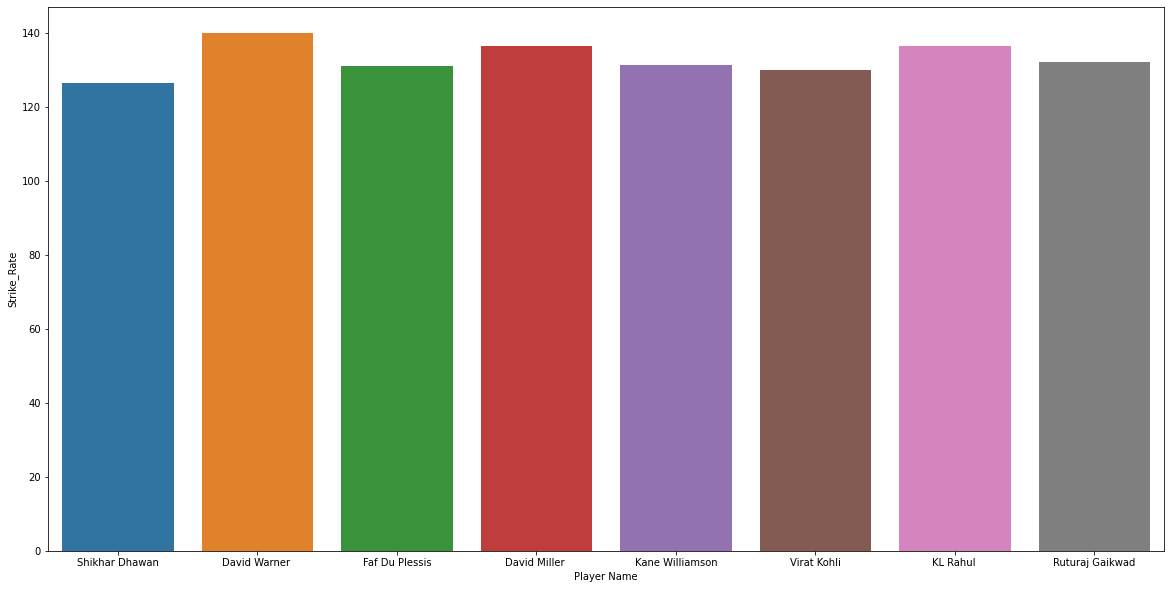

In [ ]:
#Visualization of Batters Data
#the plot shows each of the top batters strike rate.
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name', y='Strike_Rate', data=top_batters)

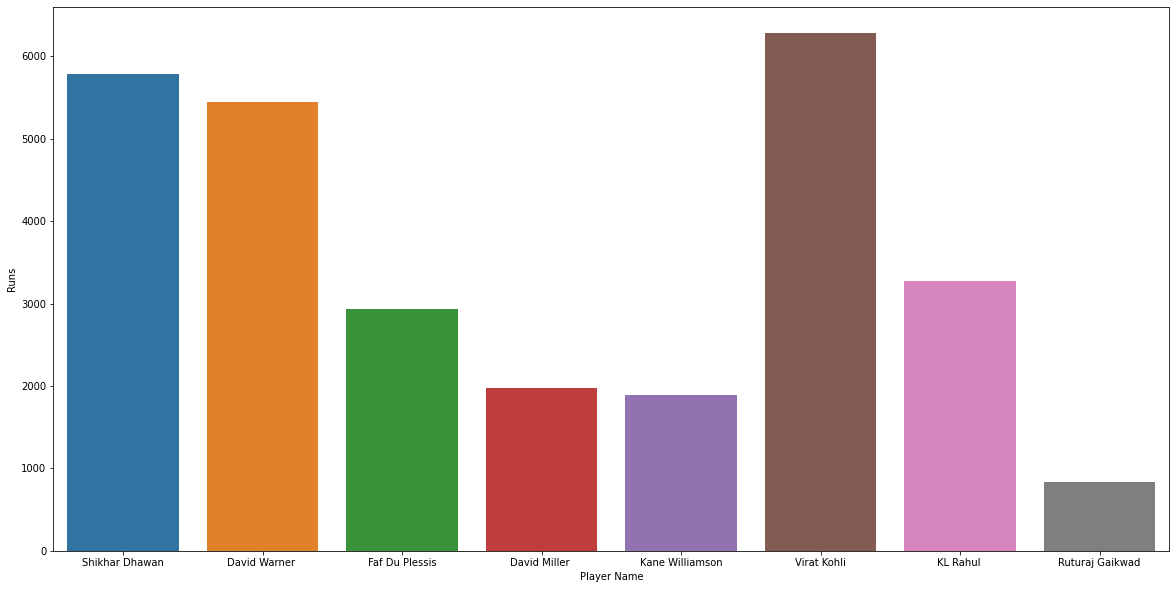

In [ ]:
#this plot shows the top batters runs.
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name', y='Runs', data=top_batters)

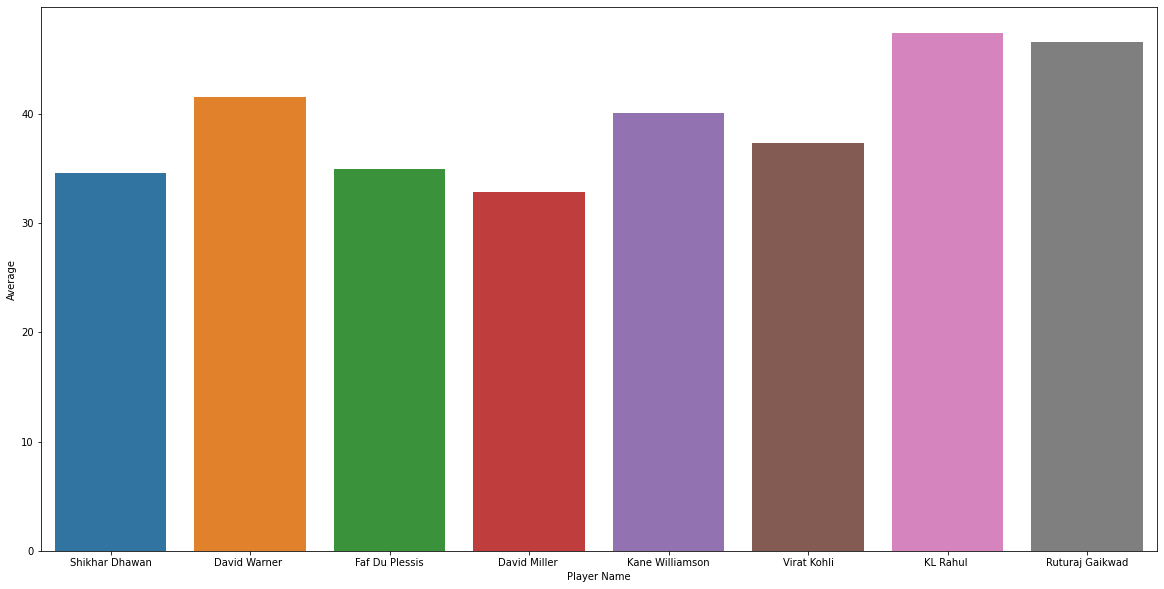

In [ ]:
#this plot shows the top batters average
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name', y='Average', data=top_batters)

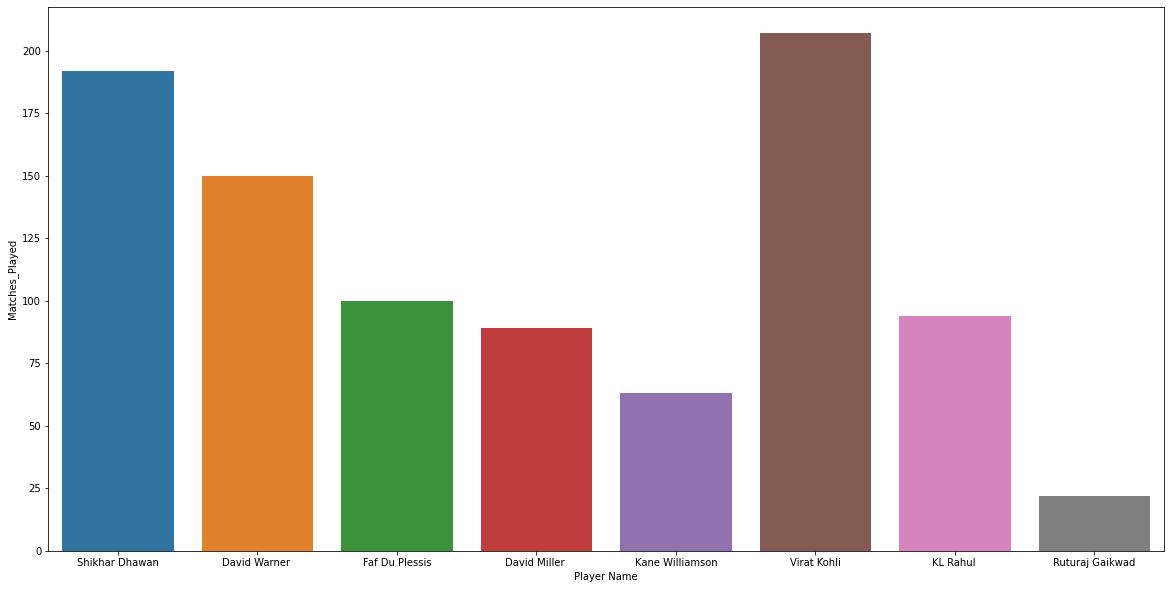

In [ ]:
#this plot shows top batters matches played.
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name', y='Matches_Played', data=top_batters)

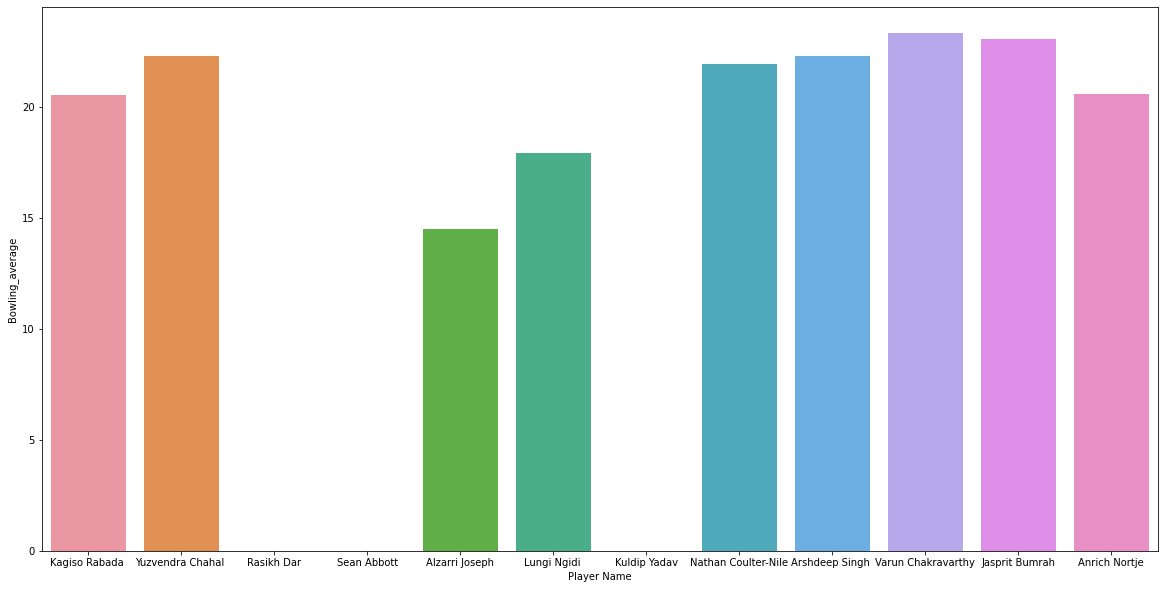

In [ ]:
#Visualization of the Bowlers Data 
#this plot shows the bowling average of the top bowlers.
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name', y='Bowling_average', data=top_bowlers)

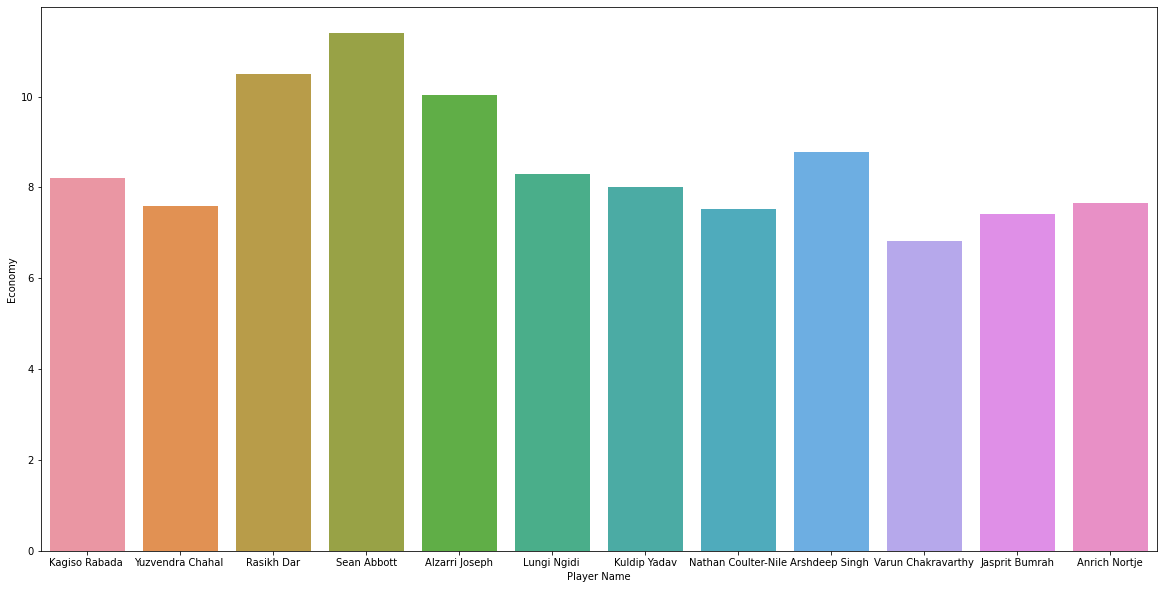

In [ ]:
#this plot shows the economy of the top bowlers.
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name', y='Economy', data=top_bowlers)

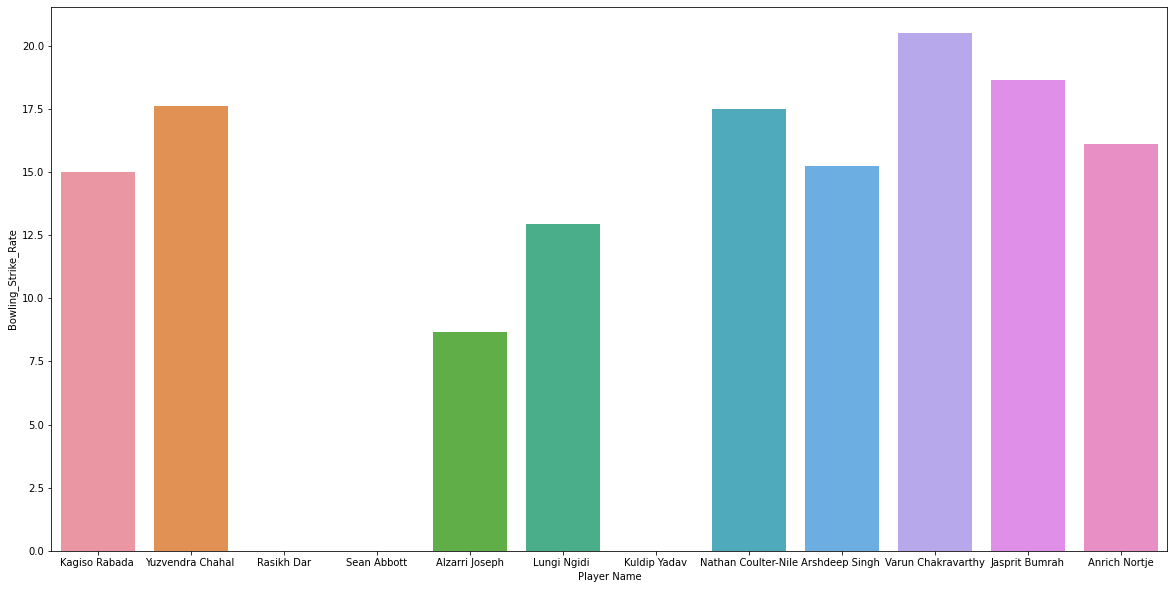

In [ ]:
#this plot shows the bowling strike rate of each of the bowlers.
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name', y='Bowling_Strike_Rate', data=top_bowlers)

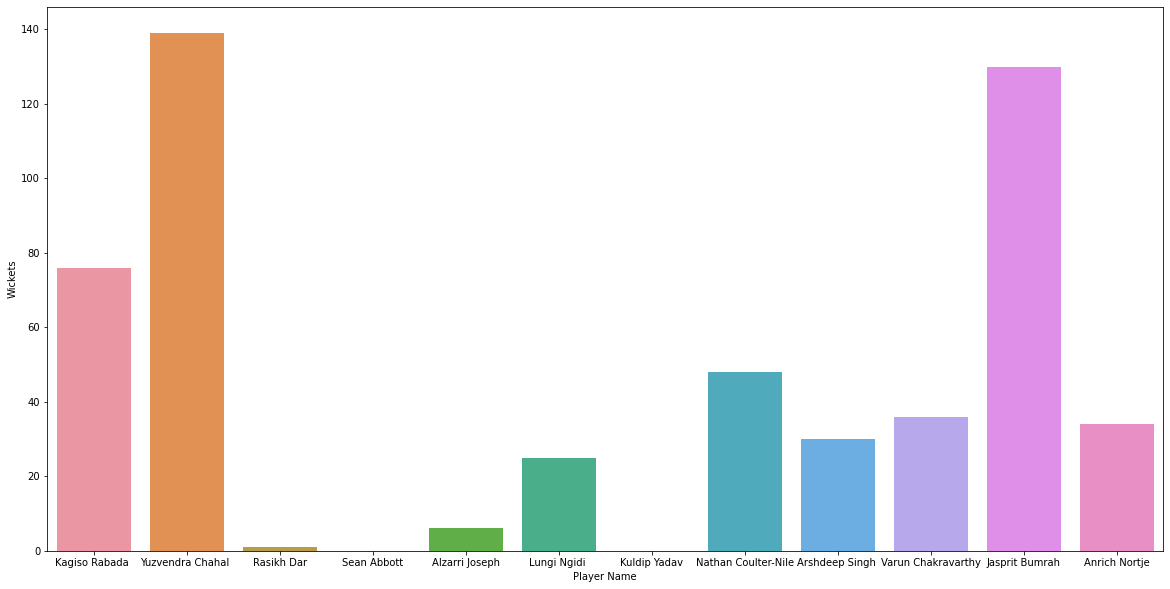

In [ ]:
#this plot showa the wickets tekan by each of the top bowlers.
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name', y='Wickets', data=top_bowlers)

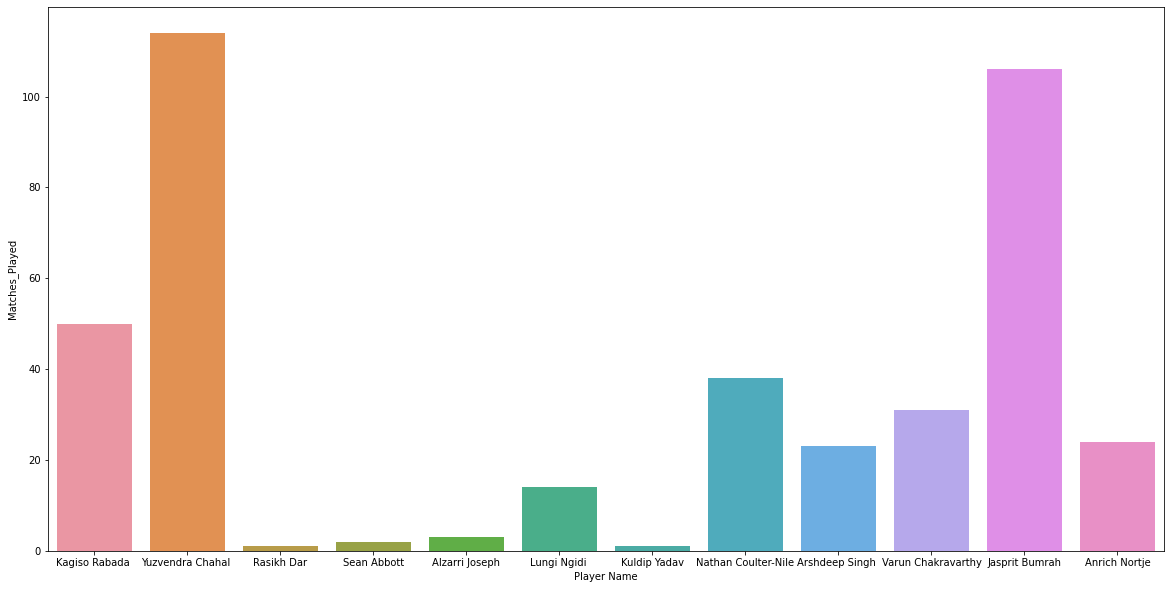

In [ ]:
#this plot shows the matches played by the top bowlers.
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name', y='Matches_Played', data=top_bowlers)

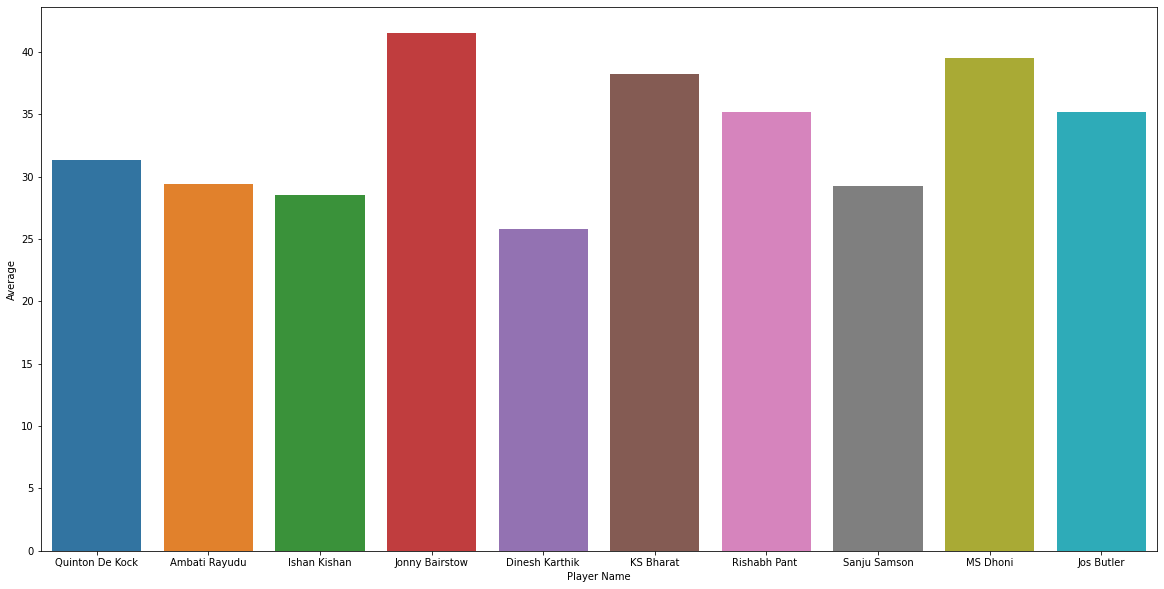

In [ ]:
#Visualization of the Keepers Data
#this plot shows the average of the top keepers.
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name', y='Average', data=top_keepers)

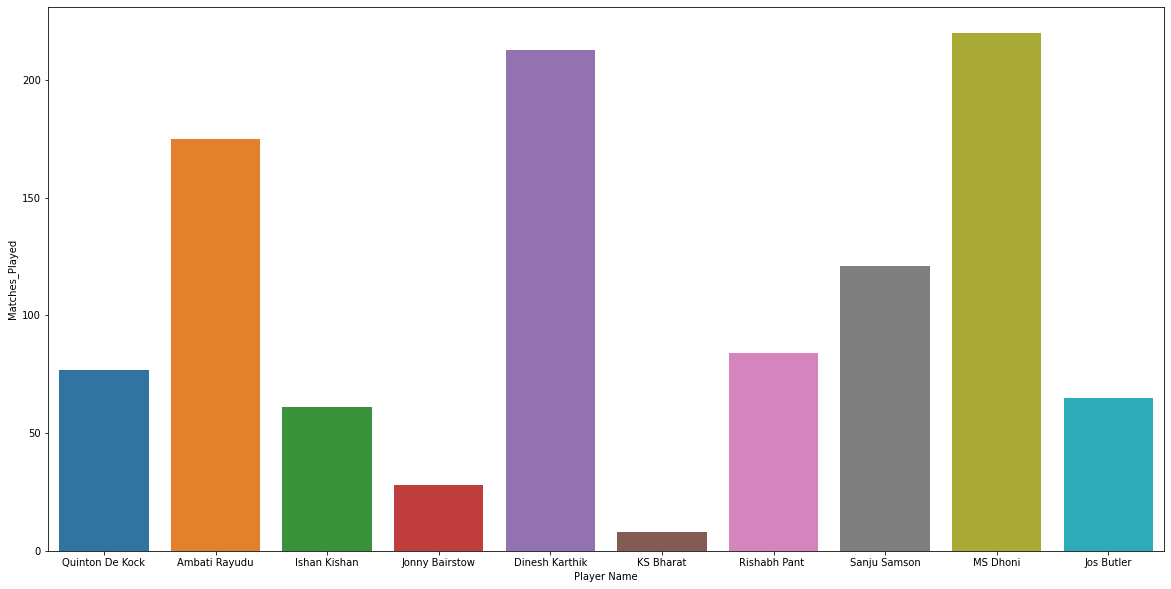

In [ ]:
#this plot shows the matches played by the top keepers.
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name', y='Matches_Played', data=top_keepers)

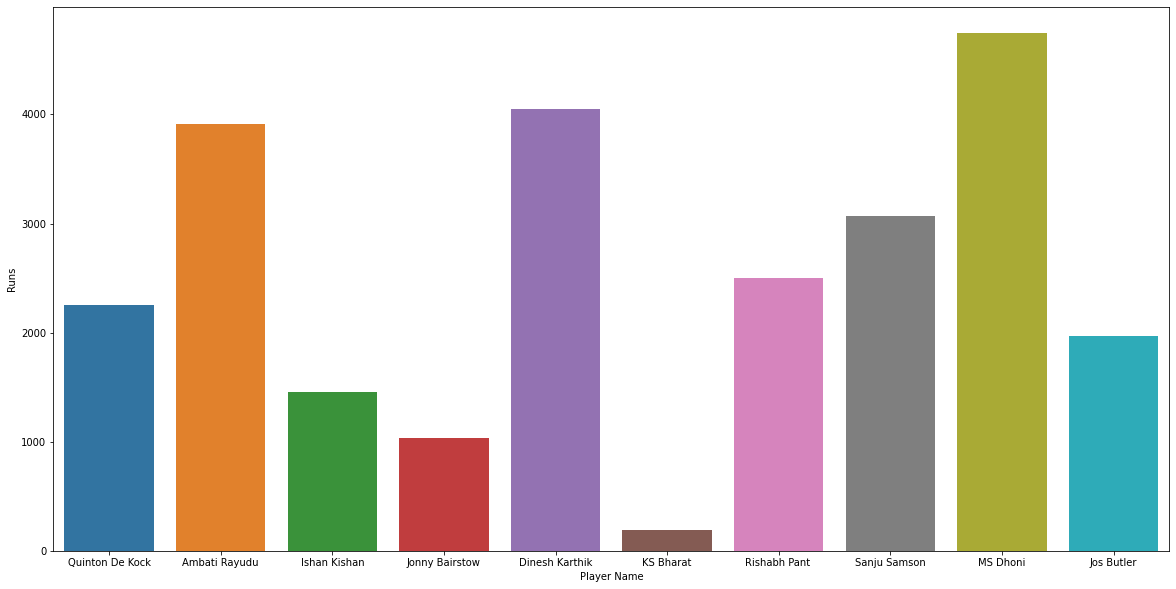

In [ ]:
#this plot shows the runs by the keepers.
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name', y='Runs', data=top_keepers)

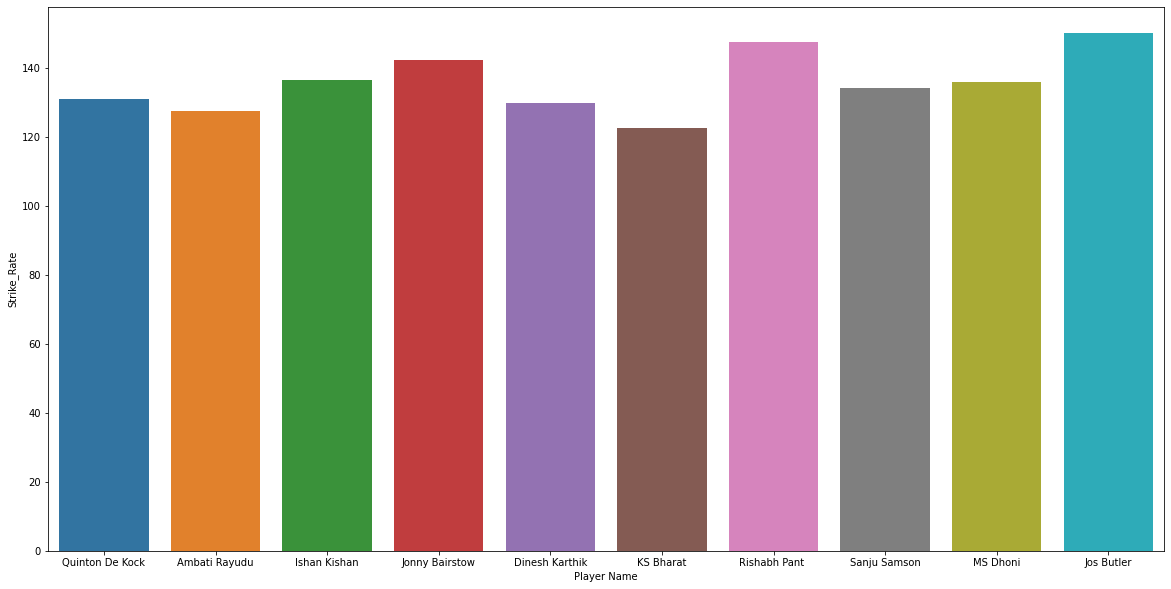

In [ ]:
#this plot shows the strike rate of the top keepers.
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name', y='Strike_Rate', data=top_keepers)

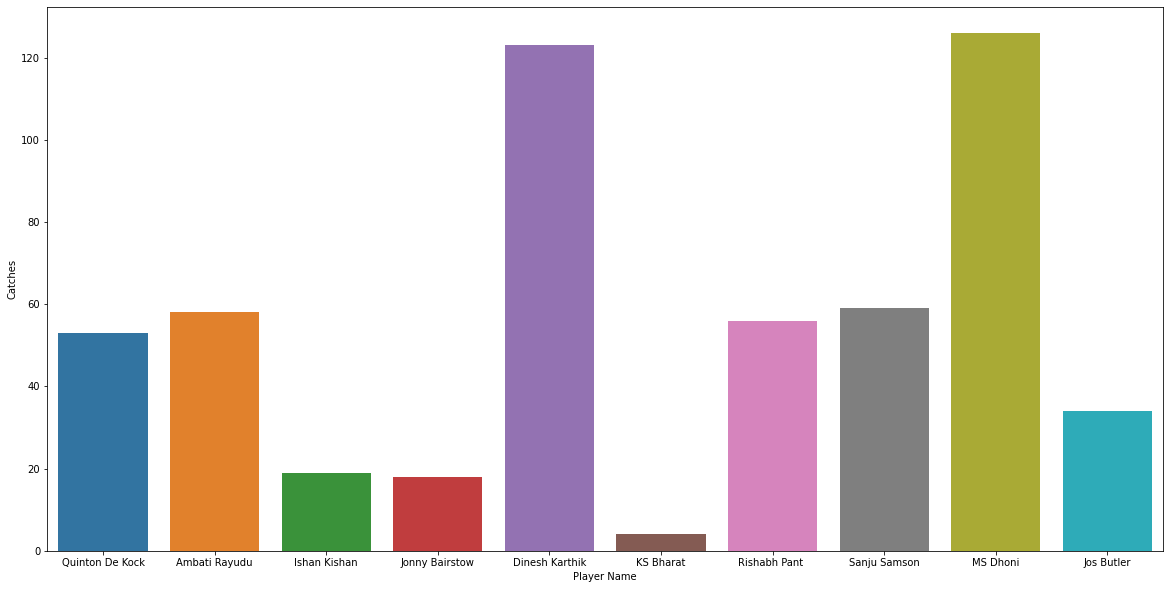

In [ ]:
#this plot shows the catches taken by the keepers.
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name', y='Catches', data=top_keepers)

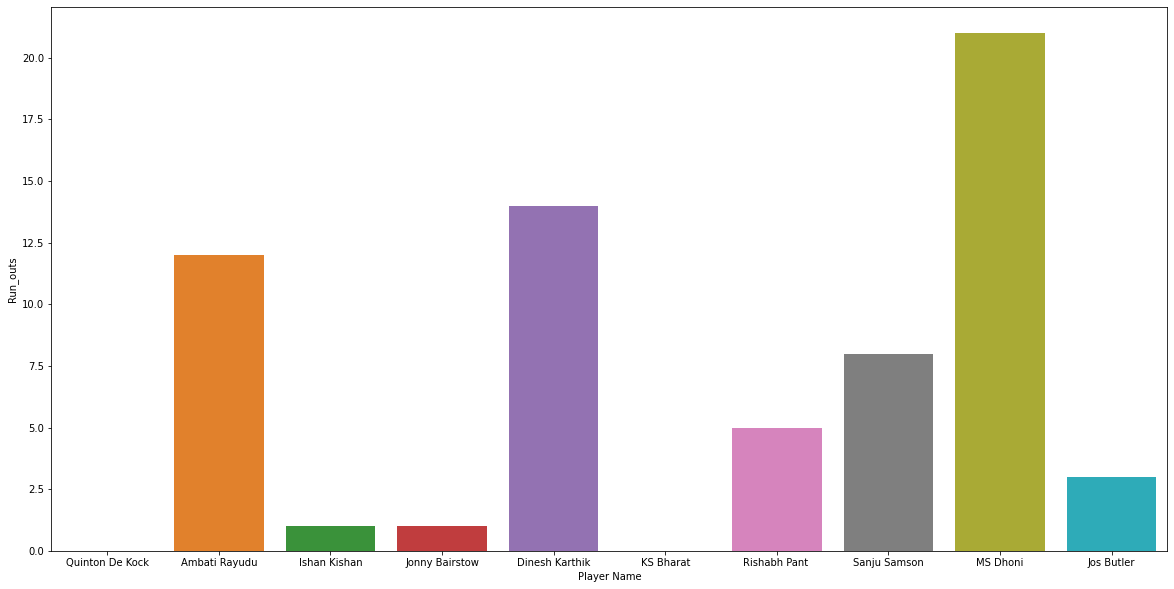

In [ ]:
#this plot shows the run outs done by the top keepers.
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name', y='Run_outs', data=top_keepers)

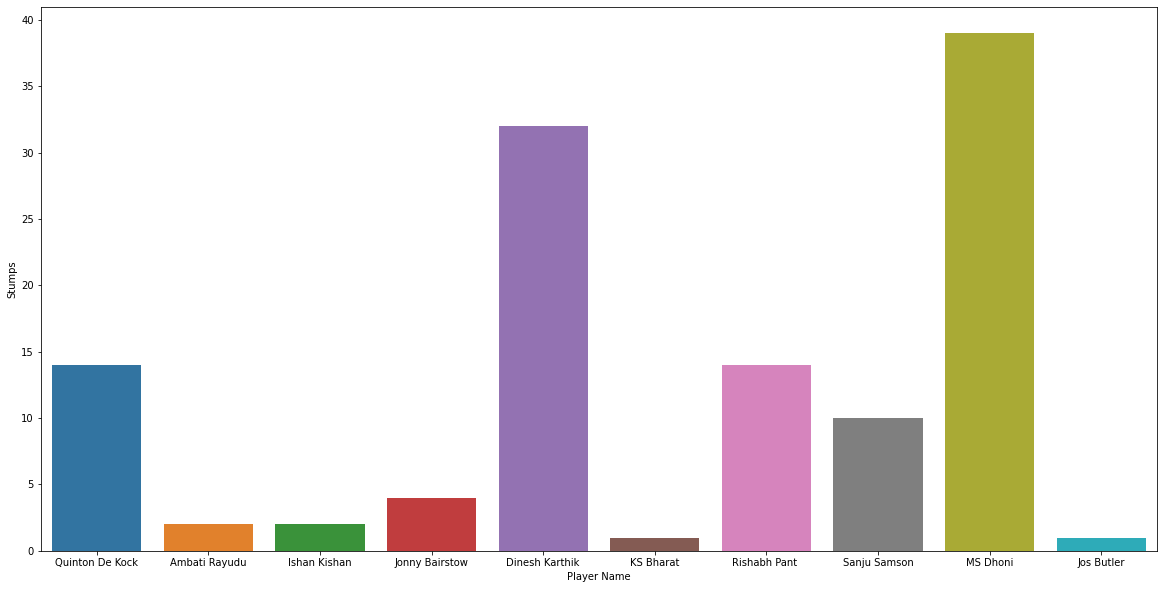

In [ ]:
#this plot shows by the stumps done by the keepers.
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name', y='Stumps', data=top_keepers)

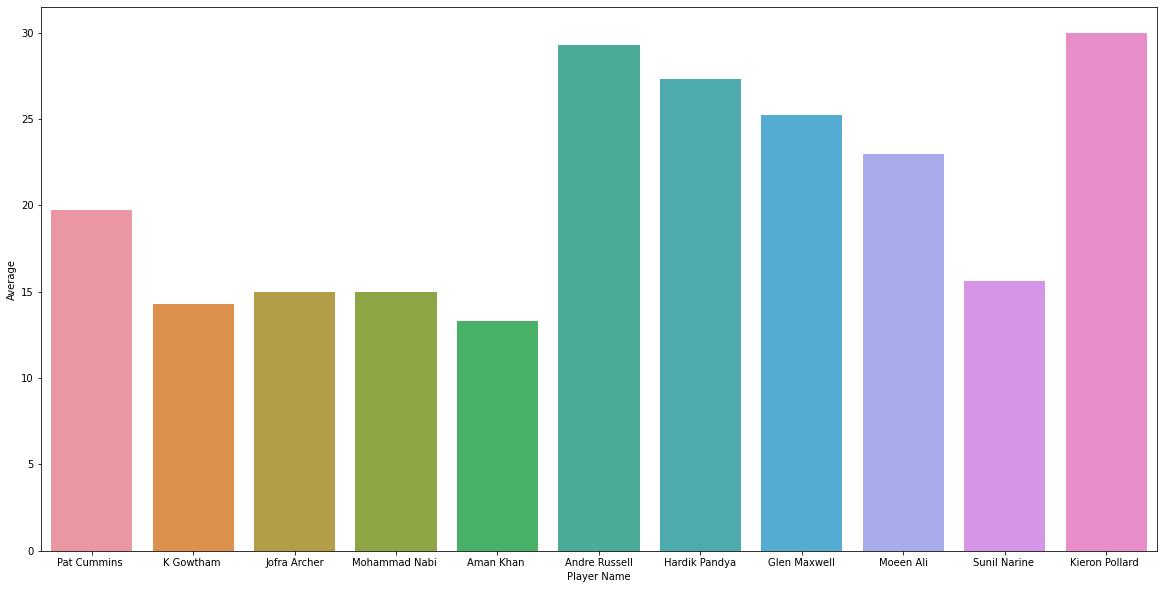

In [ ]:
#Visualization of the Allrounders Data
#this plot shows the average of the top allrounders.
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name', y='Average', data=top_allrounders)

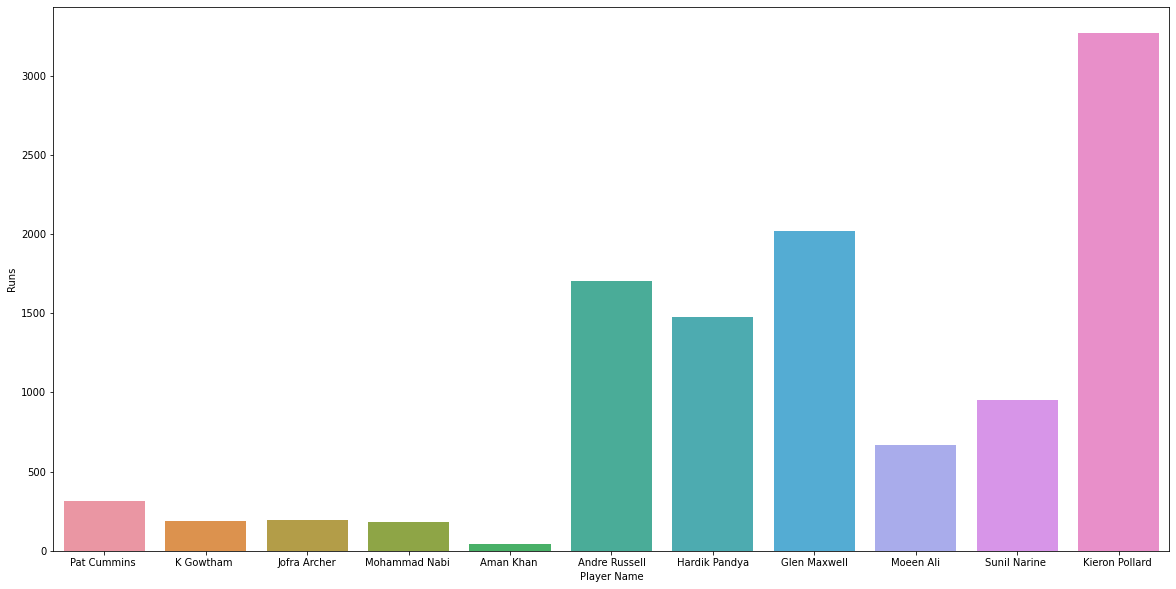

In [ ]:
#this plot shows the top allrounder's runs.
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name', y='Runs', data=top_allrounders)

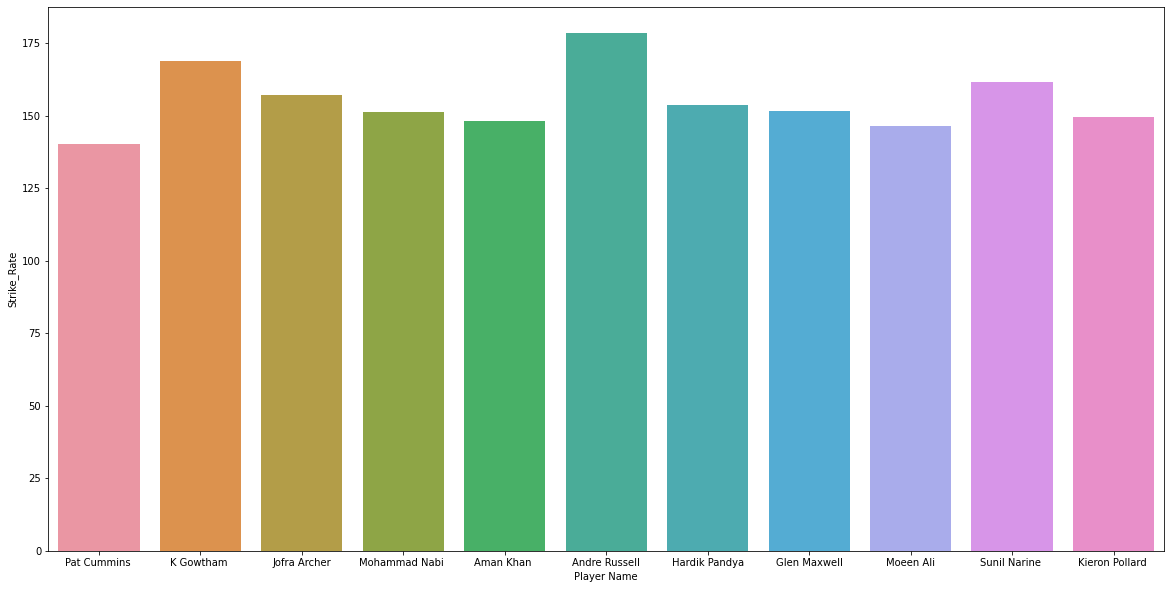

In [ ]:
#this plot shows the strike rate of the top allrounders.
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name', y='Strike_Rate', data=top_allrounders)

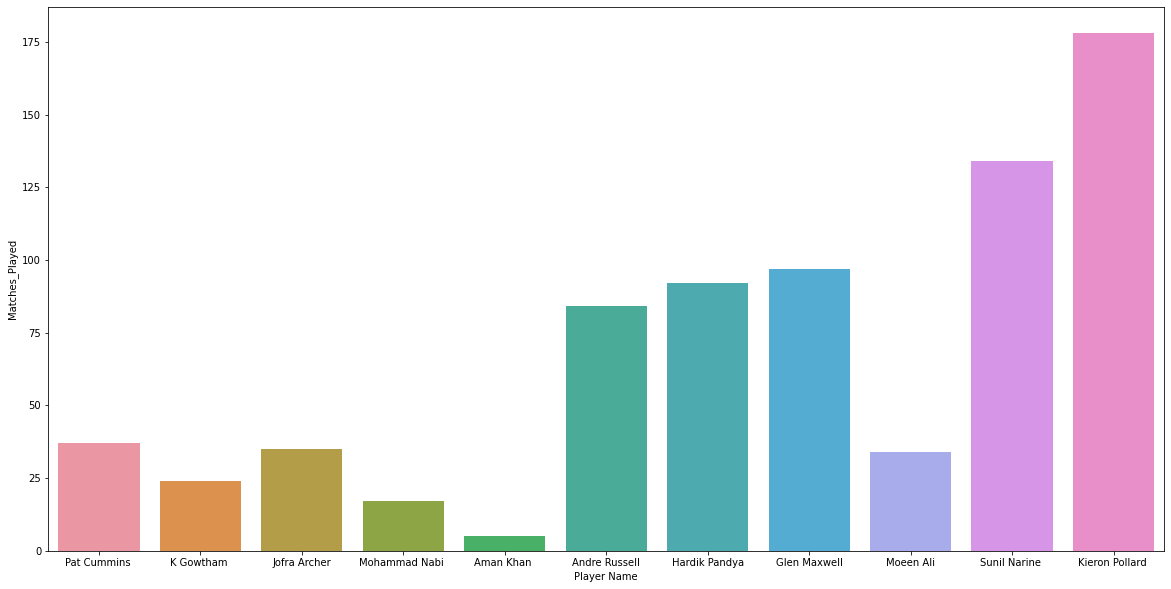

In [ ]:
#this plot shows the matches played by the top allrounders.
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name', y='Matches_Played', data=top_allrounders)

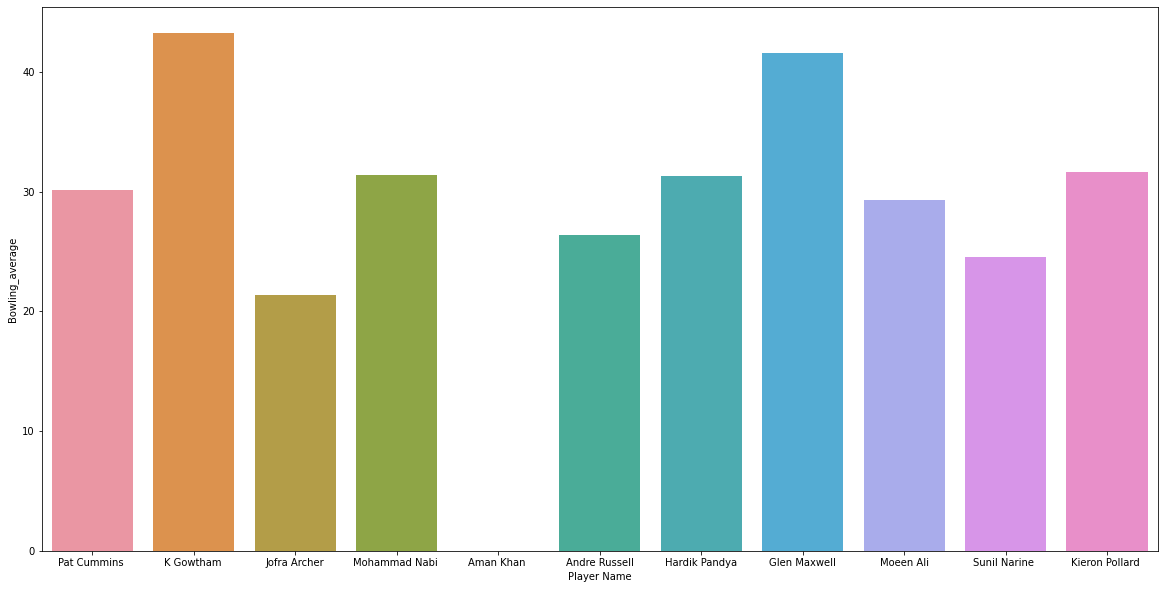

In [ ]:
#this plot shows the bowling average by the top allrounders.
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name', y='Bowling_average', data=top_allrounders)

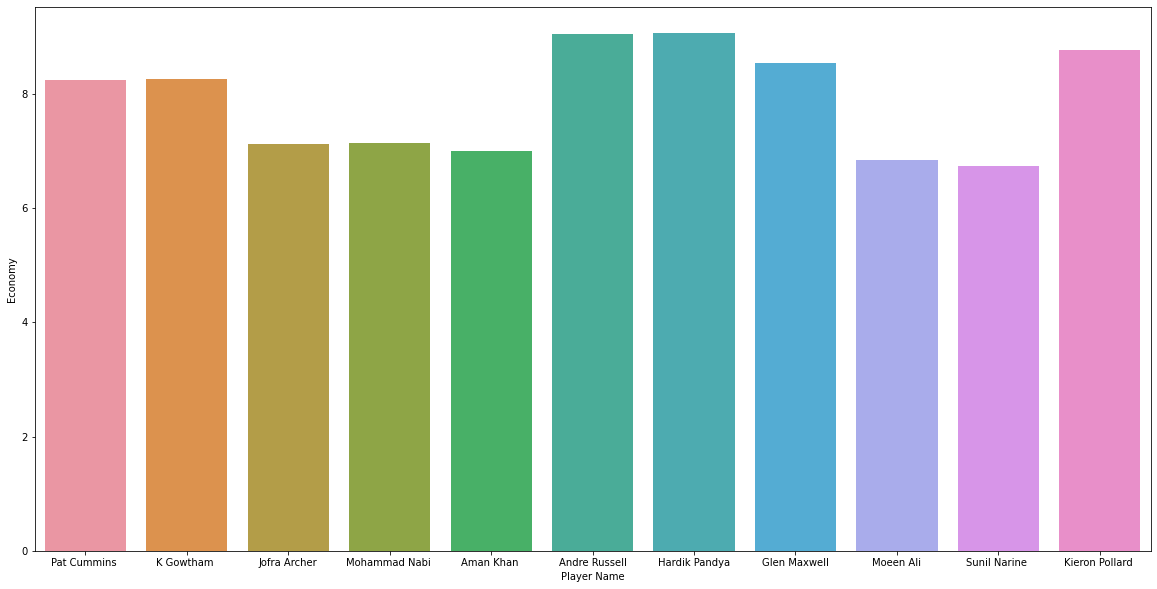

In [ ]:
#this plot shows the economy by the top allrounders.
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name', y='Economy', data=top_allrounders)

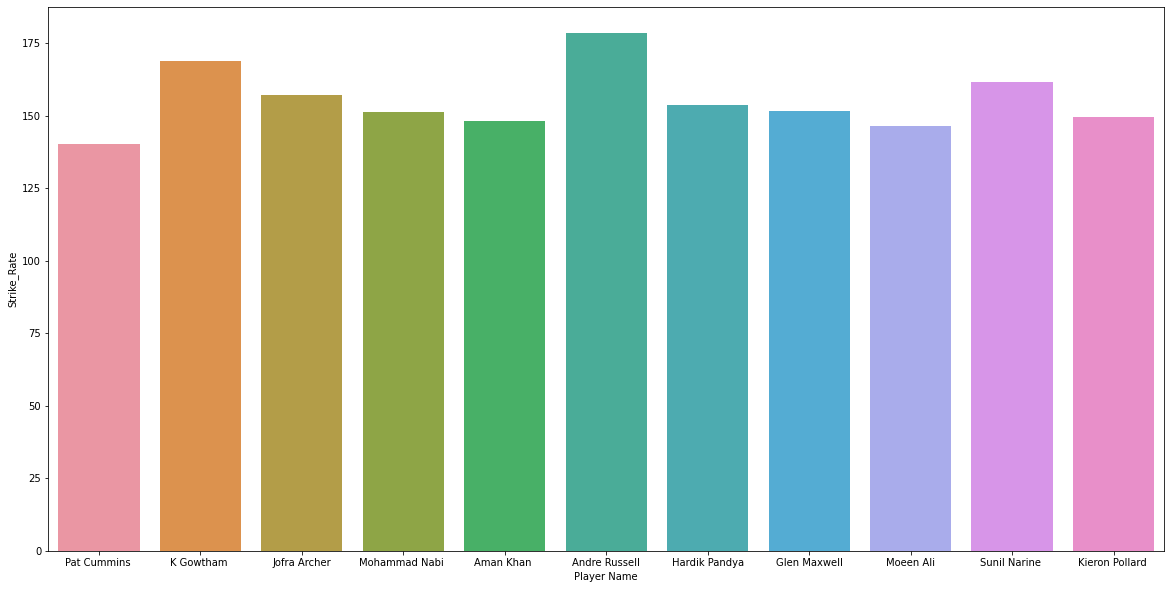

In [ ]:
#this plot shows the bowling strike rate by the top allrounders.
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name', y='Strike_Rate', data=top_allrounders)

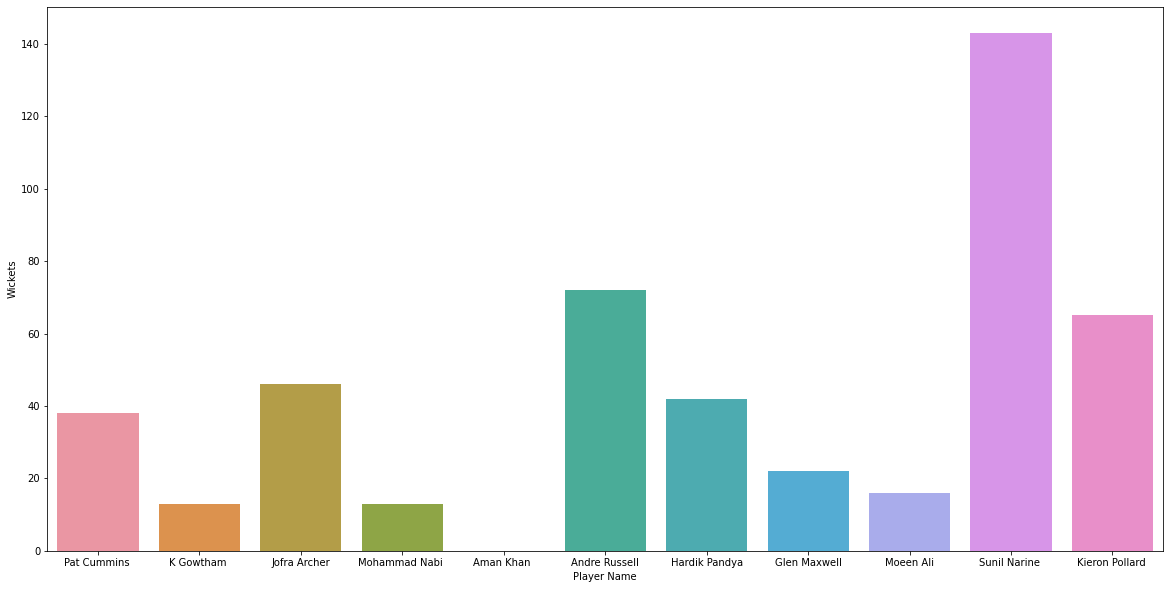

In [ ]:
#this plot shows the wickets taken by the top allrounder.
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name', y='Wickets', data=top_allrounders)

# Forming Our Best 11 for the Compaign based on the above analysis

1. We will consider the numbers of players from each category that the **T20 WORLD CUP** winning and the last year's IPL winning team played in their Final matches.
2. The Australia squad consist of 3 BAatters, 3 Allrounders, 4 Bowlers, with 1 Spin and 1 Wicket-Keepers.
3. The Chennai Super King squad consist of 4 BAatters, 3 Allrounders, 3 Bowlers, and 1 Wicket-Keepers.
4. For our fianl analysis we will consider the ratio of players in the best 11 as follows:
*   3 (Three) Batters
*   3 (Three) Allrounders
*   4 (Four) Bowlers with 2 Spin Options
*   1 (One) Wicket-Keeper





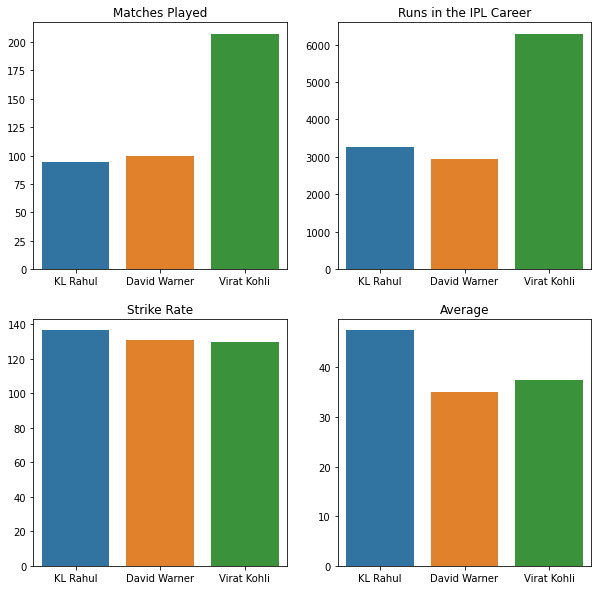

In [ ]:
 #Batters for the Final 11 - KL Rahul, Virat Kohli, David Warner,
#here, we are storing the values of each player in a separate dataframe to use for displaying using the barpot.
top_batters.reset_index(drop=True)
matches_values = [top_batters.iloc[6]['Matches_Played'],top_batters.iloc[2]['Matches_Played'],top_batters.iloc[5]['Matches_Played']]
runs_values = [top_batters.iloc[6]['Runs'],top_batters.iloc[2]['Runs'],top_batters.iloc[5]['Runs']]
average_values = [top_batters.iloc[6]['Average'],top_batters.iloc[2]['Average'],top_batters.iloc[5]['Average']]
strike_rate_values = [top_batters.iloc[6]['Strike_Rate'],top_batters.iloc[2]['Strike_Rate'],top_batters.iloc[5]['Strike_Rate']]
Labels = ['KL Rahul', 'David Warner', 'Virat Kohli']

fig, axes = plt.subplots(2,2, figsize=(10,10))
axes[0][0].set_title('Matches Played')
axes[0][1].set_title("Runs in the IPL Career")
axes[1][0].set_title("Strike Rate")
axes[1][1].set_title("Average")
sns.barplot(x=Labels, y=matches_values, ax=axes[0][0])
sns.barplot(x=Labels, y=runs_values, ax=axes[0][1])
sns.barplot(x=Labels, y=strike_rate_values, ax=axes[1][0])
sns.barplot(x=Labels, y=average_values, ax=axes[1][1])

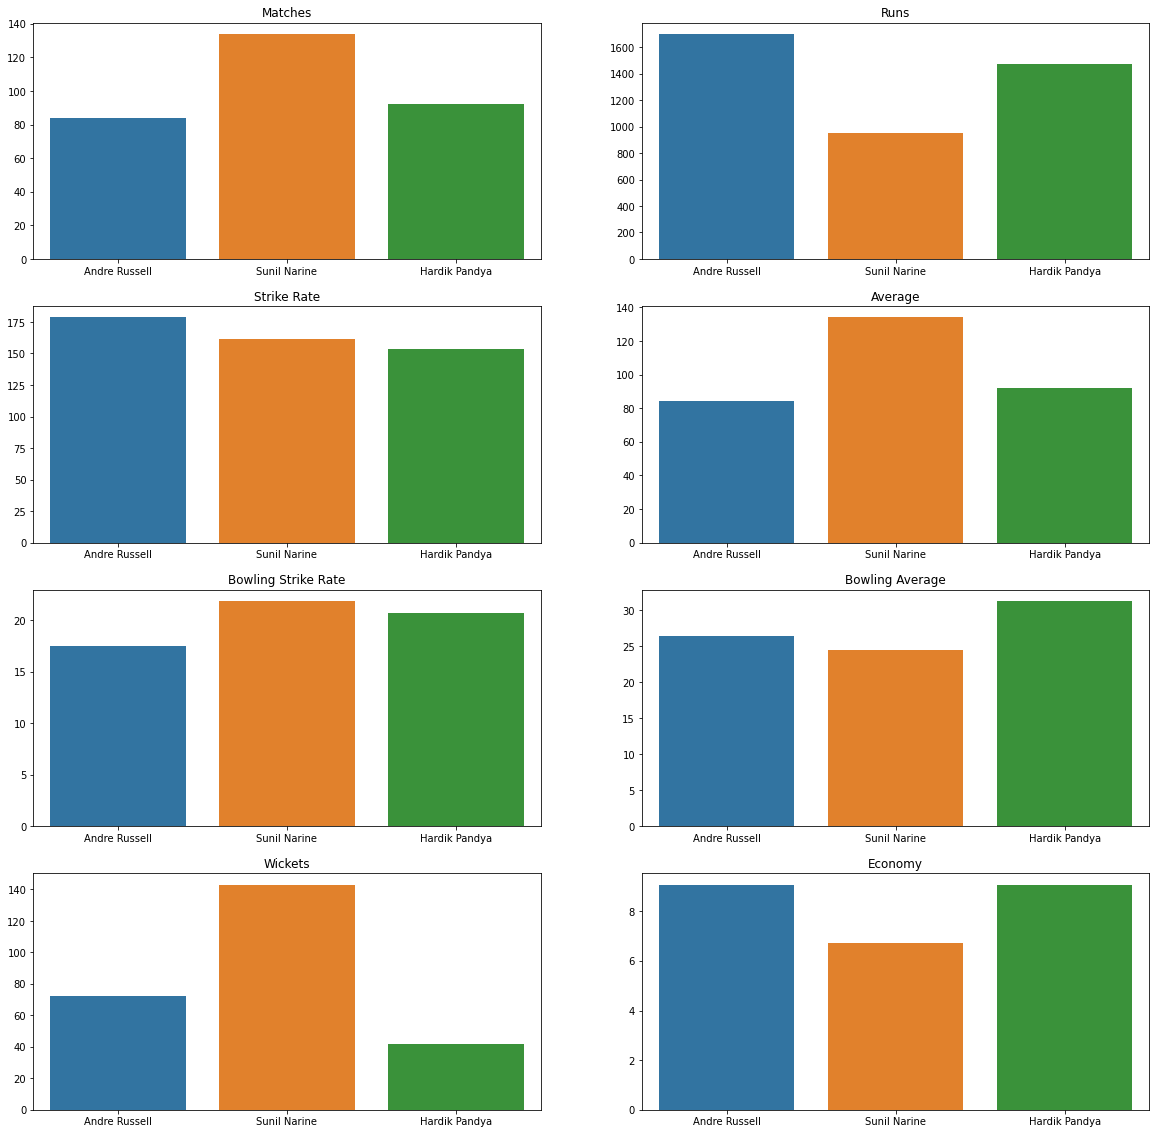

In [ ]:
#Allrounders for the final 11 - Andre Russell, Sunil Narine, Hardik Pandya
top_allrounders.reset_index(drop=True)
matches_values = [top_allrounders.iloc[5]['Matches_Played'],top_allrounders.iloc[9]['Matches_Played'],top_allrounders.iloc[6]['Matches_Played']]
runs_values = [top_allrounders.iloc[5]['Runs'],top_allrounders.iloc[9]['Runs'],top_allrounders.iloc[6]['Runs']]
average_values = [top_allrounders.iloc[5]['Average'],top_allrounders.iloc[9]['Average'],top_allrounders.iloc[6]['Average']]
strike_rate_values = [top_allrounders.iloc[5]['Strike_Rate'],top_allrounders.iloc[9]['Strike_Rate'],top_allrounders.iloc[6]['Strike_Rate']]
bowling_strike_rate_values = [top_allrounders.iloc[5]['Bowling_Strike_Rate'],top_allrounders.iloc[9]['Bowling_Strike_Rate'],top_allrounders.iloc[6]['Bowling_Strike_Rate']]
bowling_average_values = [top_allrounders.iloc[5]['Bowling_average'],top_allrounders.iloc[9]['Bowling_average'],top_allrounders.iloc[6]['Bowling_average']]
wickets_values = [top_allrounders.iloc[5]['Wickets'],top_allrounders.iloc[9]['Wickets'],top_allrounders.iloc[6]['Wickets']]
economy_values = [top_allrounders.iloc[5]['Economy'],top_allrounders.iloc[9]['Economy'],top_allrounders.iloc[6]['Economy']]

Labels = ['Andre Russell', 'Sunil Narine', 'Hardik Pandya']

fig, axes = plt.subplots(4,2, figsize=(20,20))
axes[0][0].set_title("Matches")
axes[0][1].set_title("Runs")
axes[1][0].set_title("Strike Rate")
axes[1][1].set_title("Average")
axes[2][0].set_title("Bowling Strike Rate")
axes[2][1].set_title("Bowling Average")
axes[3][0].set_title("Wickets")
axes[3][1].set_title("Economy")

sns.barplot(x=Labels, y=matches_values, ax=axes[0][0])
sns.barplot(x=Labels, y=runs_values, ax=axes[0][1])
sns.barplot(x=Labels, y=strike_rate_values, ax=axes[1][0])
sns.barplot(x=Labels, y=matches_values, ax=axes[1][1])
sns.barplot(x=Labels, y=bowling_strike_rate_values, ax=axes[2][0])
sns.barplot(x=Labels, y=bowling_average_values, ax=axes[2][1])
sns.barplot(x=Labels, y=wickets_values, ax=axes[3][0])
sns.barplot(x=Labels, y=economy_values, ax=axes[3][1])

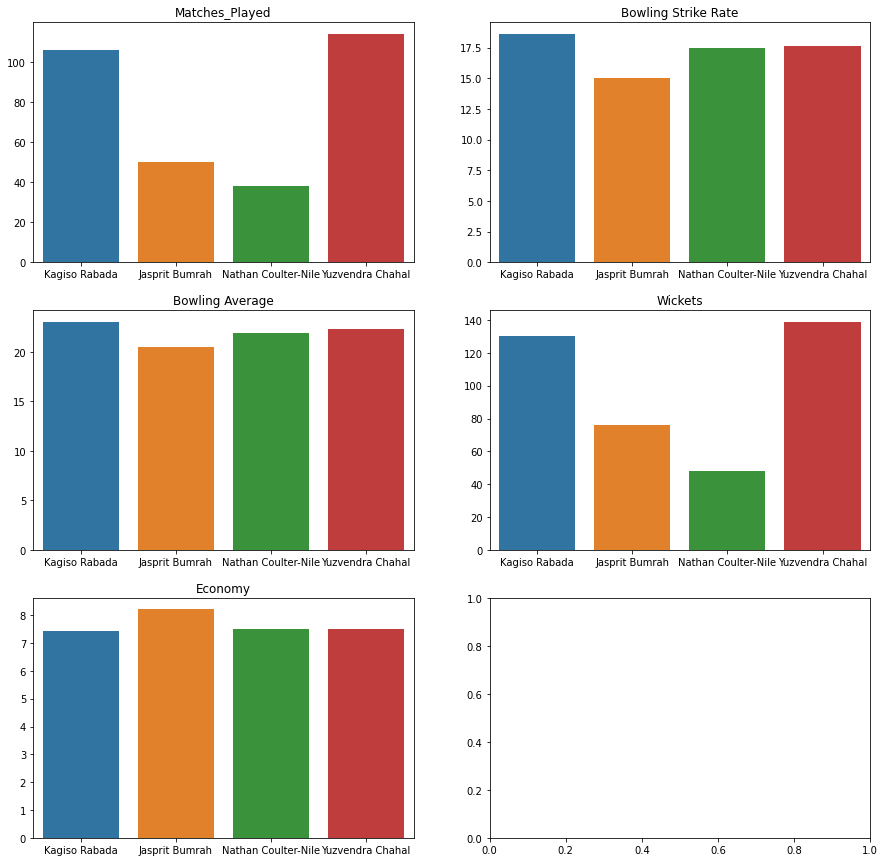

In [ ]:
#Bowlers for the final 11 - Kagiso Rabada, Jasprit Bumrah, Nathan Coulter-Nile, Yuzvendra Chahal
top_bowlers.reset_index(drop=True)
matches_values = [top_bowlers.iloc[10]['Matches_Played'],top_bowlers.iloc[0]['Matches_Played'],top_bowlers.iloc[7]['Matches_Played'],top_bowlers.iloc[1]['Matches_Played']]
bowling_strike_rate_values = [top_bowlers.iloc[10]['Bowling_Strike_Rate'],top_bowlers.iloc[0]['Bowling_Strike_Rate'],top_bowlers.iloc[7]['Bowling_Strike_Rate'],top_bowlers.iloc[1]['Bowling_Strike_Rate']]
bowling_average_values = [top_bowlers.iloc[10]['Bowling_average'],top_bowlers.iloc[0]['Bowling_average'],top_bowlers.iloc[7]['Bowling_average'],top_bowlers.iloc[1]['Bowling_average']]
wickets_values = [top_bowlers.iloc[10]['Wickets'],top_bowlers.iloc[0]['Wickets'],top_bowlers.iloc[7]['Wickets'],top_bowlers.iloc[1]['Wickets']]
economy_values = [top_bowlers.iloc[10]['Economy'],top_bowlers.iloc[0]['Economy'],top_bowlers.iloc[7]['Economy'],top_bowlers.iloc[7]['Economy']]

Labels = ['Kagiso Rabada', 'Jasprit Bumrah', 'Nathan Coulter-Nile', 'Yuzvendra Chahal']

fig, axes = plt.subplots(3,2, figsize=(15,15))
axes[0][0].set_title("Matches_Played")
axes[0][1].set_title("Bowling Strike Rate")
axes[1][0].set_title("Bowling Average")
axes[1][1].set_title("Wickets")
axes[2][0].set_title("Economy")

sns.barplot(x=Labels, y=matches_values, ax=axes[0][0])
sns.barplot(x=Labels, y=bowling_strike_rate_values, ax=axes[0][1])
sns.barplot(x=Labels, y=bowling_average_values, ax=axes[1][0])
sns.barplot(x=Labels, y=wickets_values, ax=axes[1][1])
sns.barplot(x=Labels, y=economy_values, ax=axes[2][0])

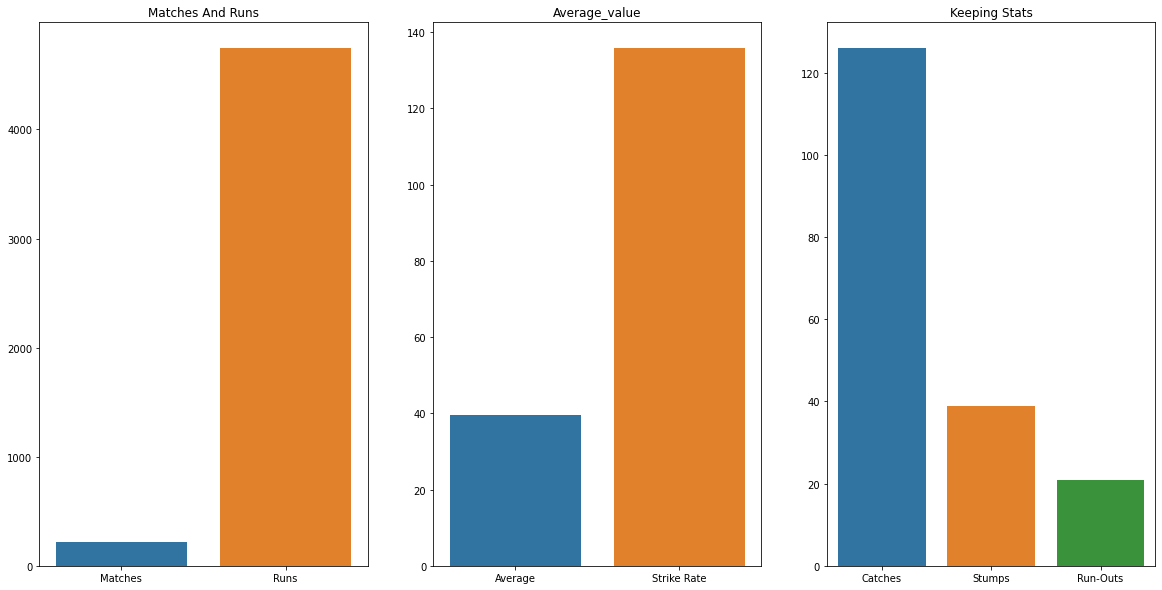

In [ ]:
 #Wicket Keepers for the Final 11 - MS Dhoni

matches_values = [top_keepers.iloc[8]['Matches_Played'],top_keepers.iloc[8]['Runs']]
average_values = [top_keepers.iloc[8]['Average'],top_keepers.iloc[8]['Strike_Rate']]
keeping_values = [top_keepers.iloc[8]['Catches'],top_keepers.iloc[8]['Stumps'],top_keepers.iloc[8]['Run_outs']]

Label1 = ['Matches', 'Runs']
Label2 = ['Average', 'Strike Rate']
Label3 = ['Catches', 'Stumps', 'Run-Outs']

fig, axes = plt.subplots(1,3, figsize=(20,10))
axes[0].set_title("Matches And Runs")
axes[1].set_title("Average_value")
axes[2].set_title("Keeping Stats")

sns.barplot(x=Label1, y=matches_values, ax=axes[0])
sns.barplot(x=Label2, y=average_values, ax=axes[1])
sns.barplot(x=Label3, y=keeping_values, ax=axes[2])

# Final 11 For the IPL 2022 Campaign

In [132]:
batter1 = top_batters.loc[(top_batters["Player Name"] == 'KL Rahul ')]
batter2 = top_batters.loc[(top_batters["Player Name"] == 'David Warner ')]
batter3 = top_batters.loc[(top_batters["Player Name"] == 'Virat Kohli')]

bowler1 = top_bowlers.loc[(top_bowlers["Player Name"] == 'Yuzvendra Chahal ')]
bowler2 = top_bowlers.loc[(top_bowlers["Player Name"] == 'Jasprit Bumrah')]
bowler3 = top_bowlers.loc[(top_bowlers["Player Name"] == 'Nathan Coulter-Nile')]
bowler4 = top_bowlers.loc[(top_bowlers["Player Name"] == 'Kagiso Rabada ')]

allrounder1 = top_allrounders.loc[(top_allrounders["Player Name"] == 'Andre Russell')]
allrounder2 = top_allrounders.loc[(top_allrounders["Player Name"] == 'Sunil Narine ')]
allrounder3 = top_allrounders.loc[(top_allrounders["Player Name"] == 'Hardik Pandya')]

keeper = top_keepers.loc[(top_keepers["Player Name"] == 'MS Dhoni')]

In [133]:
final = [batter1, batter2, batter3, allrounder1, allrounder2, allrounder3, keeper, bowler1, bowler2, bowler3, bowler4]
final_team = pd.concat(final)
final_team = final_team.drop(labels=['Matches_Played', 'Runs', 'Average', 'Strike_Rate', 'Wickets', 'Bowling_average', 'Economy', 'Bowling_Strike_Rate', 'Catches', 'Run_outs', 'Stumps'], axis=1)
final_team.reset_index(drop=True)

,Player Name,Team,Nationality
0,KL Rahul,Lucknow,Indian
1,David Warner,Delhi,Overseas
2,Virat Kohli,Bangalore,Indian
3,Andre Russell,Kolkata,Overseas
4,Sunil Narine,Kolkata,Overseas
5,Hardik Pandya,Gujarat,Indian
6,MS Dhoni,Chennai,Indian
7,Yuzvendra Chahal,Rajasthan,Indian
8,Jasprit Bumrah,Mumbai,Indian
9,Nathan Coulter-Nile,Rajasthan,Overseas
